In [4]:
#Import depencies
from NS.sampling import BIL as Sampler
import os
import rawpy
import matplotlib.pyplot as plt
import numpy as np
import skimage

from scipy.fftpack import dct, idct

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os, sys
import operator
import scipy
import pandas as pd
import seaborn as sns

from tqdm.notebook import tqdm

def plotCovINTRA(_samples, _factor, _out = None):    
    df = pd.DataFrame(_samples.T, columns=np.arange(64))
    cov = df.cov()
    
    #Remove DC coefficent
    #sng = np.sign(cov[0, 0])
    cov[0, 0] = 0.0
    m = np.max(np.abs(np.array(cov)))/_factor
    
    fig, (ax) = plt.subplots(1, 1, figsize=(12, 10))

    cmap = sns.cm.rocket_r
    ax = sns.heatmap(
        cov, 
        vmin=-m, vmax=m, center=0,
        cmap=sns.color_palette('RdBu_r', 50),
        square=True
        #linewidths=.1
    )

    ax.invert_yaxis()
    x = np.linspace(0, 63, 9, dtype = np.int)
    labels = np.linspace(0, 63, 9, dtype = np.int)
    plt.xticks(x, labels)
    plt.yticks(x, labels)

    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='center'
    );
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=45,
        horizontalalignment='center'
    );

    # X axis on top
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    ax.set_xlim(-0.5, cov.shape[0]+0.5)
    ax.set_ylim(cov.shape[1]+0.5, -0.5)
    
    if(_out is not None):
        plt.savefig(_out, bbox_inches = 'tight')
    plt.show()
    
    return cov

def plotCovINTER(_samples, _factor, _out = None):
    _size = _samples.shape[0]
    df = pd.DataFrame(_samples.T, columns = np.arange(_size))
    cov = df.cov()
    
    #Remove DC coefficents
    for i in range(_size//64):
        for j in range(_size//64):
            cov[i*64, i*64] = 0.0
            
    m = np.max(np.abs(np.array(cov)))/_factor
    
    fig, (ax) = plt.subplots(1, 1, figsize = (12, 10))

    cmap = sns.cm.rocket_r
    ax = sns.heatmap(
        cov, 
        vmin=-m, vmax=m, center=0,
        cmap=sns.color_palette('RdBu_r', 50),
        square=True#,
        #linewidths=.01
    )

    ax.invert_yaxis()
    x = np.linspace(0, _size-1, 9, dtype = np.int)
    labels = np.linspace(0, _size-1, 9, dtype = np.int)
    
    plt.xticks(x, labels)
    plt.yticks(x, labels)

    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='center'
    );
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=45,
        horizontalalignment='center'
    );

    # X axis on top
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    ax.set_xlim(-0.5, cov.shape[0]+0.5)
    ax.set_ylim(cov.shape[1]+0.5, -0.5)
    
    if(_out is not None):
        plt.savefig(_out, bbox_inches = 'tight')
    plt.show()
    
    return cov

# 4-Lattices

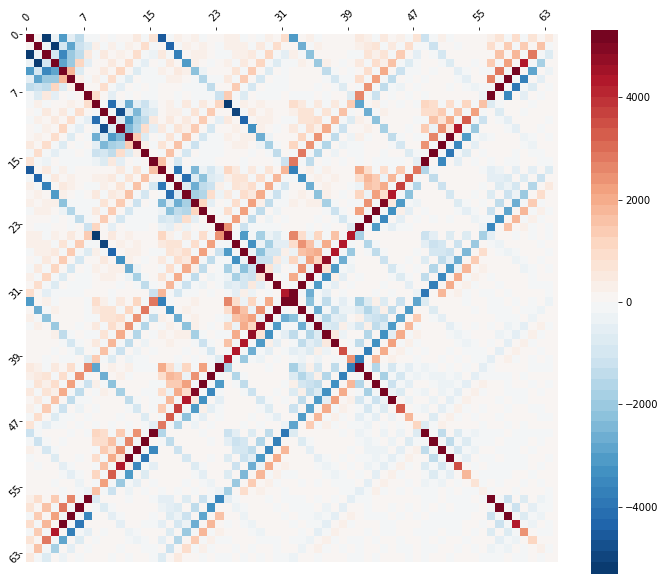

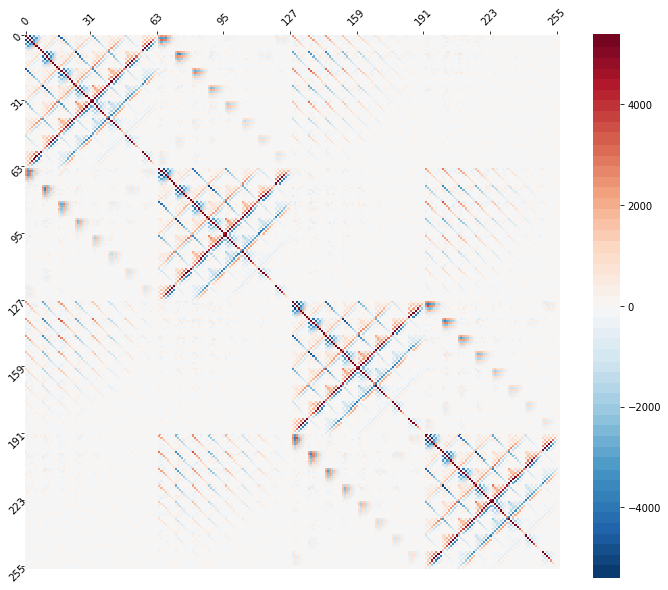

In [6]:
arr_DCT = np.load('data/3.npy')
w, h = arr_DCT.shape
### INTRAS ###
samples_intra = np.zeros((64, (w//8)*(h//8)))
cpt = 0

pbar = tqdm(total=samples_intra.shape[1])
w, h = arr_DCT.shape
for u in range(w//8):
    for v in range(h//8):
        samples_intra[:, cpt] = arr_DCT[8*u:8*(u+1), 8*v:8*(v+1)].ravel()
        cpt+=1
        pbar.update(1)       
pbar.close()

### INTER ###
n_bloc = 2
samples_inter = np.zeros((2*2*64, ((w//(8*n_bloc))*(h//(8*n_bloc)))))

cpt = 0
pbar = tqdm(total=samples_inter.shape[1])
w, h = arr_DCT.shape
for i_bloc in range(w//(8*n_bloc)):
    for j_bloc in range(h//(8*n_bloc)):#scan left to right
        for i in range(n_bloc):
            for j in range(n_bloc):#scan left to right, starting from the top left
                samples_inter[(i*n_bloc+j)*64:(i*n_bloc+j+1)*64, cpt] = \
                (arr_DCT[(i_bloc*n_bloc+i)*8:(i_bloc*n_bloc+i+1)*8,(j_bloc*n_bloc+j)*8:(j_bloc*n_bloc+j+1)*8]).ravel() 
        cpt+=1
        pbar.update(1)
pbar.close()

cov_intra = plotCovINTRA(samples_intra, 10)
cov_inter = plotCovINTER(samples_inter, 10)

# Intra-only

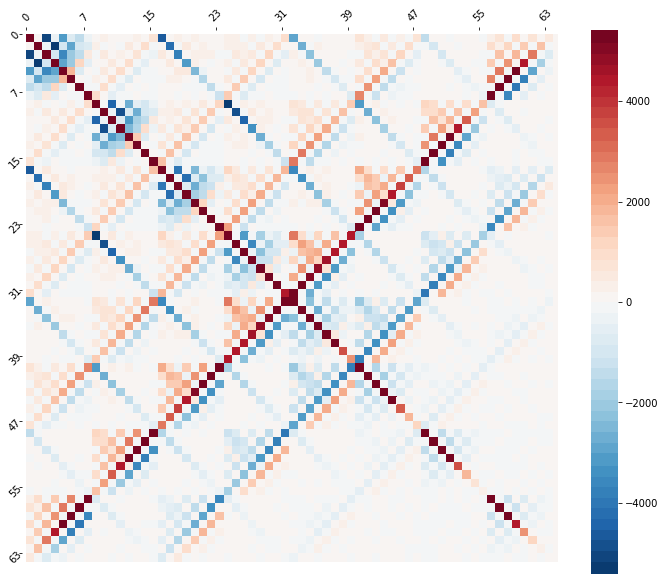

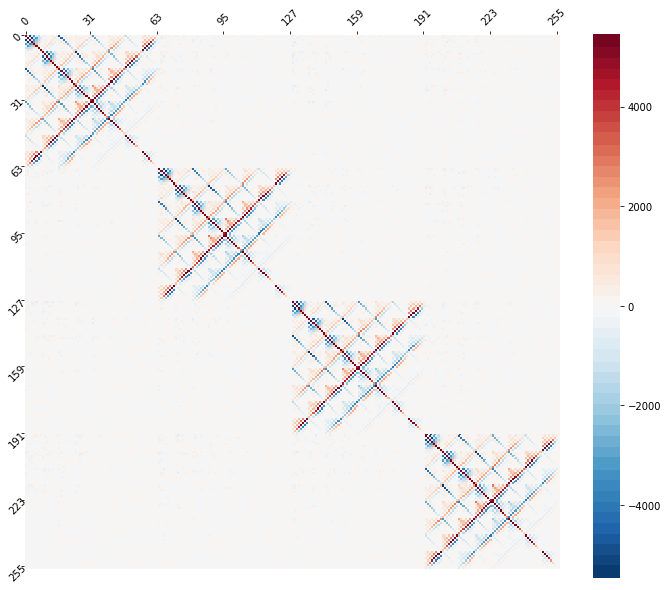

In [7]:
arr_DCT = np.load('data/2.npy')
w, h = arr_DCT.shape
### INTRAS ###
samples_intra = np.zeros((64, (w//8)*(h//8)))
cpt = 0

pbar = tqdm(total=samples_intra.shape[1])
w, h = arr_DCT.shape
for u in range(w//8):
    for v in range(h//8):
        samples_intra[:, cpt] = arr_DCT[8*u:8*(u+1), 8*v:8*(v+1)].ravel()
        cpt+=1
        pbar.update(1)       
pbar.close()

### INTER ###
n_bloc = 2
samples_inter = np.zeros((2*2*64, ((w//(8*n_bloc))*(h//(8*n_bloc)))))

cpt = 0
pbar = tqdm(total=samples_inter.shape[1])
w, h = arr_DCT.shape
for i_bloc in range(w//(8*n_bloc)):
    for j_bloc in range(h//(8*n_bloc)):#scan left to right
        for i in range(n_bloc):
            for j in range(n_bloc):#scan left to right, starting from the top left
                samples_inter[(i*n_bloc+j)*64:(i*n_bloc+j+1)*64, cpt] = \
                (arr_DCT[(i_bloc*n_bloc+i)*8:(i_bloc*n_bloc+i+1)*8,(j_bloc*n_bloc+j)*8:(j_bloc*n_bloc+j+1)*8]).ravel() 
        cpt+=1
        pbar.update(1)
pbar.close()

cov_intra = plotCovINTRA(samples_intra, 10)
cov_inter = plotCovINTER(samples_inter, 10)



# Independent

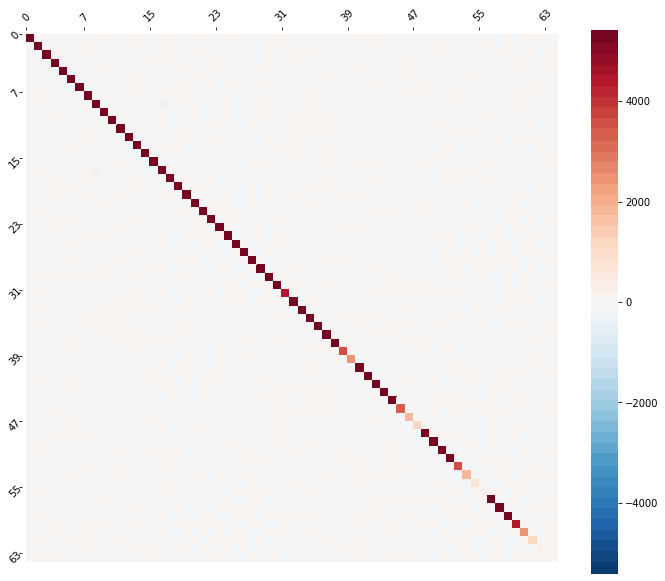

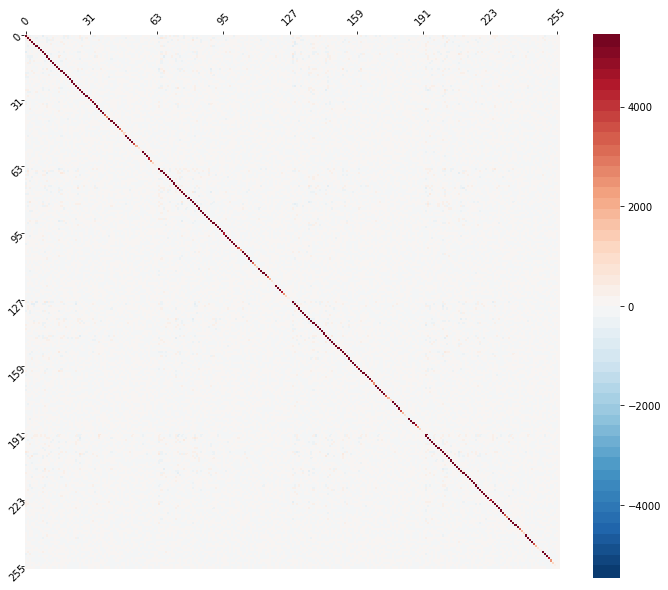

In [8]:
arr_DCT = np.load('data/1.npy')
w, h = arr_DCT.shape
### INTRAS ###
samples_intra = np.zeros((64, (w//8)*(h//8)))
cpt = 0

pbar = tqdm(total=samples_intra.shape[1])
w, h = arr_DCT.shape
for u in range(w//8):
    for v in range(h//8):
        samples_intra[:, cpt] = arr_DCT[8*u:8*(u+1), 8*v:8*(v+1)].ravel()
        cpt+=1
        pbar.update(1)       
pbar.close()

### INTER ###
n_bloc = 2
samples_inter = np.zeros((2*2*64, ((w//(8*n_bloc))*(h//(8*n_bloc)))))

cpt = 0
pbar = tqdm(total=samples_inter.shape[1])
w, h = arr_DCT.shape
for i_bloc in range(w//(8*n_bloc)):
    for j_bloc in range(h//(8*n_bloc)):#scan left to right
        for i in range(n_bloc):
            for j in range(n_bloc):#scan left to right, starting from the top left
                samples_inter[(i*n_bloc+j)*64:(i*n_bloc+j+1)*64, cpt] = \
                (arr_DCT[(i_bloc*n_bloc+i)*8:(i_bloc*n_bloc+i+1)*8,(j_bloc*n_bloc+j)*8:(j_bloc*n_bloc+j+1)*8]).ravel() 
        cpt+=1
        pbar.update(1)
pbar.close()

cov_intra = plotCovINTRA(samples_intra, 10)
cov_inter = plotCovINTER(samples_inter, 10)

